In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

1. Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos

In [4]:
df_completo= pd.read_csv('attacks_completo.csv')

In [10]:
#convertimos los valores de la col de año en un integer para poder trabajar con ellos más facimente
df_completo['year'] = df_completo['year'].astype('int32')

In [6]:
df_completo.sample(3)

,Unnamed: 0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
4121,4121,1958.11.14,1958,Invalid,SOUTH AFRICA,Western Cape Province,False Bay,Fishing,male,M,NaN,NaN,Questionable incident,NaN,"No injury, shark leapt at him",14-Nov-1958
3802,3802,1962.06.17,1962,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Rolled off raft,Barry Bryan Reed,M,11,11h50,1.8 m [6'] shark,N,"8"" laceration on left calf",17-Jun-1962
2884,2884,1984.07.00.a,1984,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Sodwana,Spearfishing,Rory OÂConnor,M,NaN,NaN,Raggedtooth shark,N,"No injury, shark hit swim fin",Jul-1984


In [7]:
#hacemos un filtro para que aparezcan solo los registros desde el año 2015
df_activity= df_completo[df_completo['year']>2015]
df_activity.sample(2)

,Unnamed: 0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
115,115,2017.07.20.c,2017,Invalid,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Ellie Rogier,F,8,NaN,Shark involvement not confirmed,NaN,Foot injured,20-Jul-2017
37,37,2018.03.09.b,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,15h30,3.5 m shark,N,"No injury, said to have been charged by sharks...",9-Mar-2018


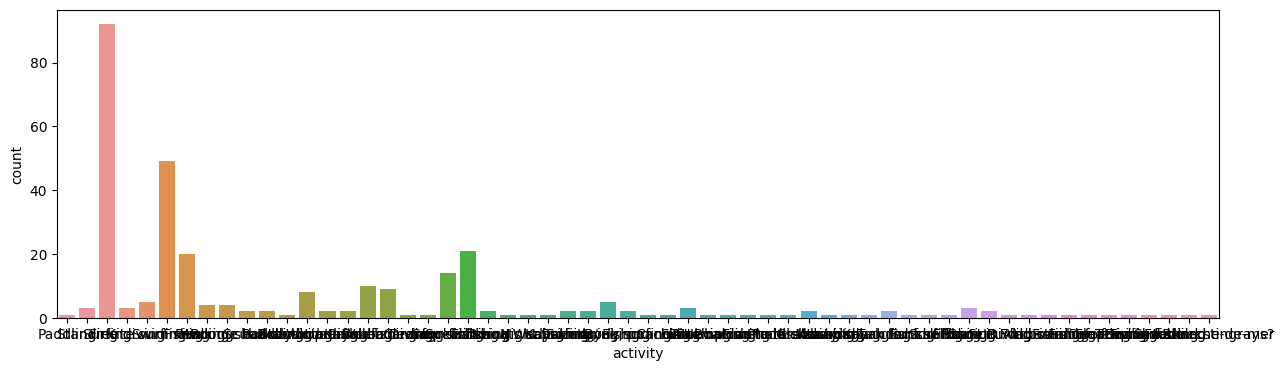

In [12]:
plt.figure(figsize=(15, 4))
fig= sns.countplot (x='activity', data=df_activity)
plt.show()

En esta gráfica (aunque es ilegible) aparecen los tipos de ataques que estan figuran en nuestro dataset y el numero de personas que los han sufrido, es decir el numero de veces o registros que hay de cada tipo en nuestras tablas.

2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015.

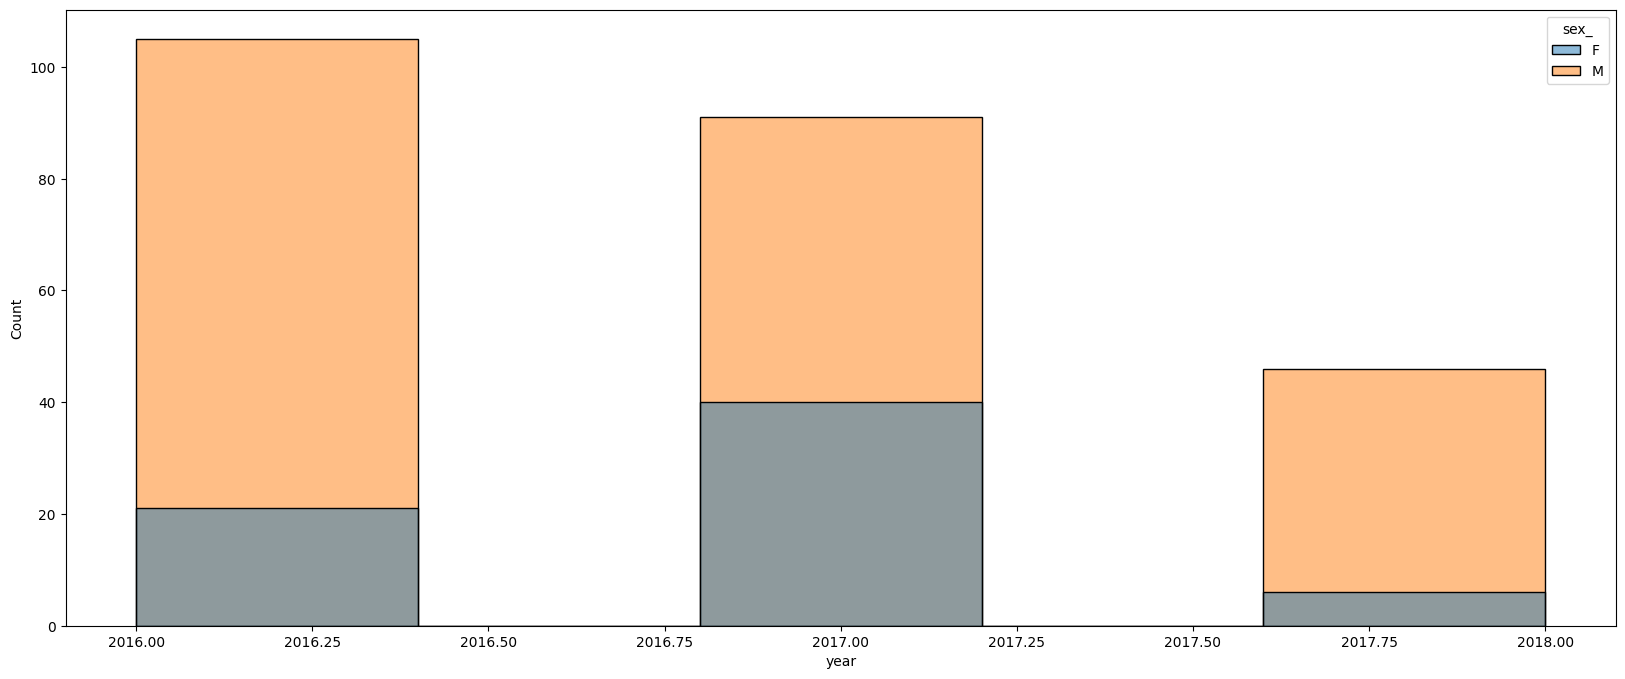

In [17]:
plt.figure(figsize=(20, 8))
fig= sns.histplot (x='year', data = df_activity, bins=5, hue= 'sex_')
plt.show()

En esta gráfica aparecen varias barras que representan los ataques sufridos de tiburones cada año. La altura de cada una de las barras indica el numero de ataques y la posición en la que se situa, el año en que se produjeron. Además cada barra tiene dos colores, el naranja representa los ataques sufridos por hombres, el otro por mujeres.

3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

In [43]:

df_1500= df_completo[df_completo['year']>=1500]
df_1500.head(1)

,Unnamed: 0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
0,0,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018


In [50]:
df2=df_1500.groupby ('year')['case_number'].count()
df3 = pd.DataFrame(df2).reset_index()
df3.head(3)


,year,case_number
0,1543,1
1,1554,1
2,1555,1


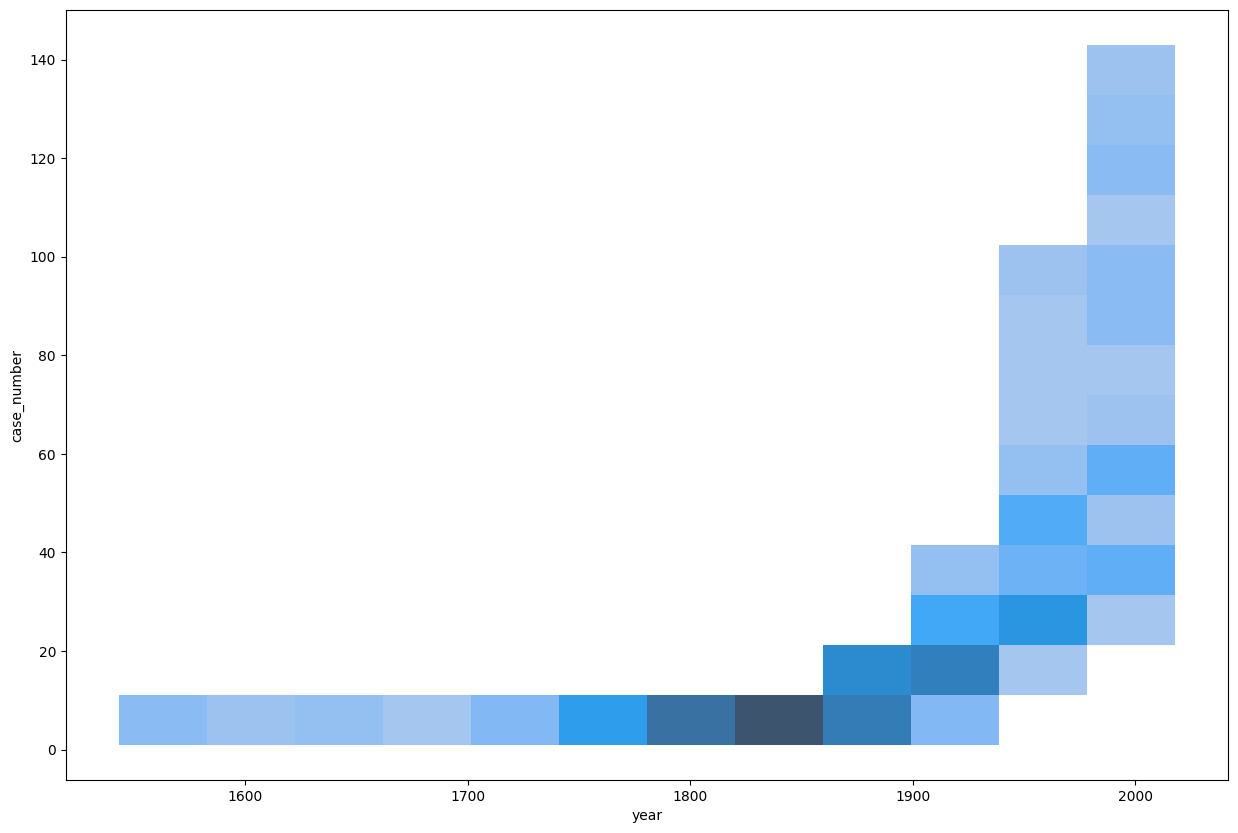

In [52]:
plt.figure (figsize=(15, 10))
fig=sns.histplot (data= df3, x='year', y='case_number')

In [55]:
df3['case_number'].values.max()
#para comprobar que esta bien

143

En la gráfica aparecen el numero de ataques que se han producido cada año desde contando a partir del año 1500. Así vemos que en el 1600 apenas llegan 15 o 20 casos mientras que a partir del 2000 alcanzan un máximo de 143 ataques registrados.

4. Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

In [57]:
df_usa = df_completo[(df_completo['country']=='AUSTRALIA') | (df_completo['country']=='USA') | (df_completo['country']=='SOUTH AFRICA')]
df_usa_1900 = df_usa [df_usa['year']>1900]
df_usa_1900.sample(2)

,Unnamed: 0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
2392,2392,1995.01.24,1995,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Isipingo,Swimming,Mthokozisi Cedrick Mpanza,M,14,18h00,"Tiger shark, 1.8 m [6']",Y,"FATAL, right thigh bitten & femur exposed, sha...",24-Jan-1995
4439,4439,1951.02.01,1951,Unprovoked,AUSTRALIA,New South Wales,Bondi Beach,Swimming,Harry Sheen,M,14,NaN,1.2 m [4'] shark,N,Leg bitten,01-Feb-1951


In [64]:
df4= df_usa_1900.groupby(['year', 'country'])['case_number'].count().reset_index()
df4.head(1)

,year,country,case_number
0,1901,AUSTRALIA,2


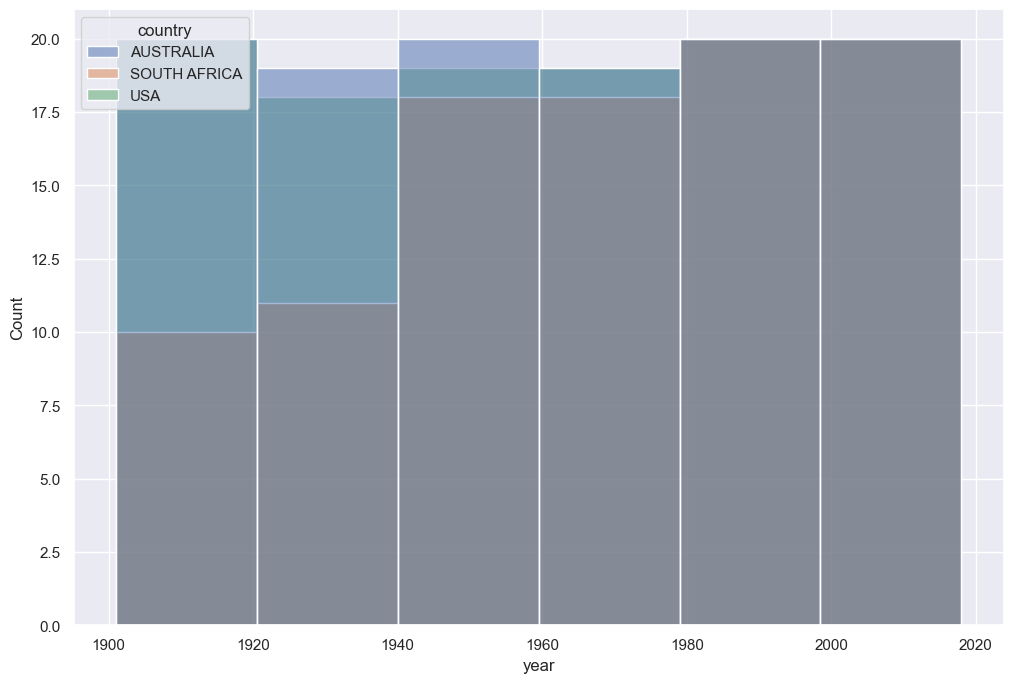

In [74]:
plt.figure(figsize=(12, 8))
fig= sns.histplot( x='year',  bins=6, data= df4, hue='country');

En esta gráfica cada barra representa, según su altura el numero de casos y según el color, el país en el que se ha producido los mismos. Además, la posicion de la barra con respecto al eje de las 'x' indica el año en que se han producido los ataques, desde 1900 hasta 2020.

5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

In [78]:
df5=df_completo.groupby('country')['case_number'].count().reset_index()
df5.head(1)

,country,case_number
0,PHILIPPINES,1


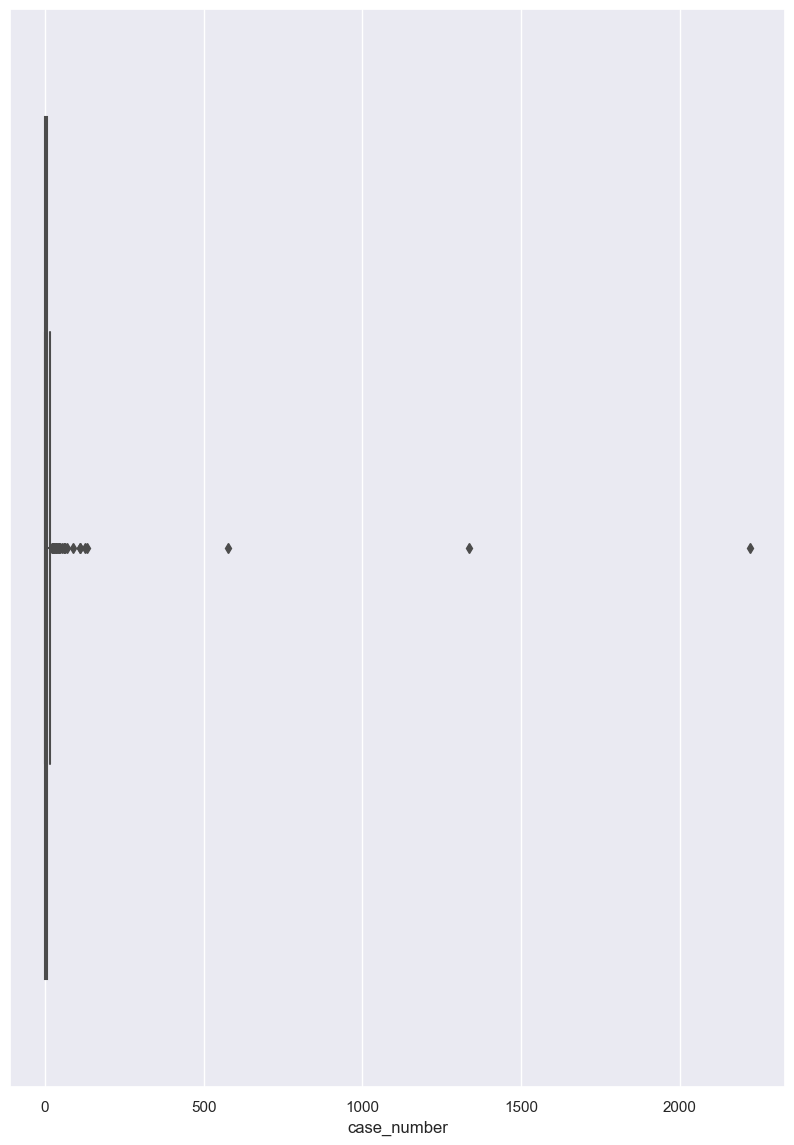

In [95]:
plt.figure(figsize =(10,14))
fig = sns.boxplot( x ='case_number', data = df5, hue='country');